Implication
=======

An implication has an antecedent and a consequent.  If the antecedent is true, the consequent must also be true.  **Prove-It** has an `Implies` **Operation** that may be used to represent an implication, formatted with the $\Rightarrow$ symbol.  While this is a core concept, and aliased at the top `proveit` level, it is defined outside of the core in the `proveit.logic` package.  It is known in the core for use in the *modus ponens* and *hypothetical reasoning* derivation steps discussed below.  First we will take a brief tour of the `Implies` class.

In [3]:
from proveit import Implies # actually defined in proveit.logic.boolean.boolOps.py
from proveit.common import A, B, C, X
A_impl_B = Implies(A, B)
A_impl_B # Expression meaning "A implies B":

Implies is an Operation:

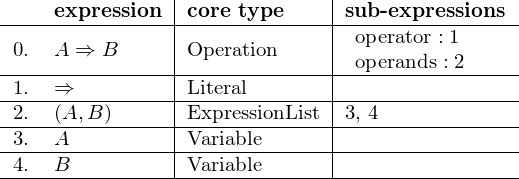

In [4]:
A_impl_B.exprInfo()

One can access the `antecedent` and the `consequent` of the implication:

In [5]:
A_impl_B.antecedent

In [6]:
A_impl_B.consequent

## Modus Ponens

*Modus ponens* is a straightforward derivation step in which you can derive $B$ assuming that $A \Rightarrow B$ and $A$ are both true statements.  You can apply this derivation step explicitly by calling the `deriveConsequent` method of any `Implies` object.

In [7]:
B_from_A = A_impl_B.deriveConsequent(assumptions=[A, A_impl_B])
B_from_A

Recall from the previous tutorial that **Prove-It**, in its core, is not concerned about truth-aptness.  Neither $A$ nor $B$ are required to be intrinsically truth-apt.  The above **KnownTruth** simply means that $B$ is a true statement if we assume that $A$ and $A \Rightarrow B$ are true statements.

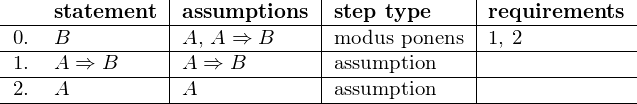

In [8]:
B_from_A.proof()

In order for the *modus ponens* derivation step to succeed, the implication and the hypothesis must be proven to be true under the applicable assumptions.

In [9]:
from proveit import ModusPonensFailure
try:
    A_impl_B.deriveConsequent(assumptions=[A])
except ModusPonensFailure as e:
    print "EXPECTED ERROR:", e

EXPECTED ERROR: Unable to prove B assuming {A}: Implication, A => B, is not proven


In [10]:
from proveit import ModusPonensFailure
try:
    A_impl_B.deriveConsequent(assumptions=[A_impl_B])
except ModusPonensFailure as e:
    print "EXPECTED ERROR:", e

EXPECTED ERROR: Unable to prove B assuming {A => B}: Antecedent of A => B is not proven


If the implication is a **KnownTruth**, the assumptions of the **KnownTruth** are automatically added.  This is the case for any **Expression** method that takes an `assumptions` parameter called indirectly through a **KnownTruth** object.  The following is a demonstration:

In [11]:
A_impl_B_truth = A_impl_B.prove([A_impl_B])
A_impl_B_truth

In [12]:
# A => B is automatically included as an assumption because it is required
# as an assumption of A_impl_B_truth
A_impl_B_truth.deriveConsequent(assumptions=[A]) 

### Using an overcomplete set of assumptions

When taking any derivation step under a set of assumptions, any assumptions that are unnecessary will be discarded.  In the example below, we include $C$ as an extra, irrelevant assumption.  It is discarded as it is not needed in the proof.

In [15]:
A_impl_B.deriveConsequent(assumptions=[A_impl_B, A, C]) 

## Hypothetical Reasoning

*Hypothothetical reasoning* is, in some sense, the reverse process of *modus ponens*.  In *modus ponens* the consequent is derived from an implication (and its antecedent).  In *hypothetical reasoning* the implication is derived from the consequent, discarding the antecedent as an assumption.  A common notation to indicate a derivation rule is to display a horizontal line with a new truth below the line that can be derived from what is above the line.  Using this notation, we have

Modus ponens: $\frac{\boldsymbol{\vdash} A \Rightarrow B}{A \boldsymbol{\vdash} B}$

Hypothetical reasoning: $\frac{A \boldsymbol{\vdash} B}{\boldsymbol{\vdash} A \Rightarrow B}$

We chose to write these in a form that exhibits the symmetry.  If $B$ is true assuming $A$, it follows, via *hypothetical reasoning*, that $A \Rightarrow B$.  We prove an implication by assuming the antecedent and deriving the consequent, reasoning through a hypothetical scenario.  This step may be taken by calling `asImplication` (or `asImpl` as an abbreviation) on a **KnownTruth**.

We will demonstrate *hypothetical reasoning* be proving the transitivity property of implications, $A \Rightarrow C$ given $A \Rightarrow B$ and $B \Rightarrow C$.   We have already created the `A_impl_B` object to represent $A \Rightarrow B$ and have proven $\{A,A \Rightarrow B\} \boldsymbol{\vdash} B$.  Let us now create a `B_impl_C` object to represent $B \Rightarrow C$:

In [11]:
B_impl_C = Implies(B, C)
B_impl_C

Now we can prove $C$ given $A$, $A \Rightarrow B$, and $B \Rightarrow C$.  This uses the previously derived proof of $\{A,A \Rightarrow B\} \boldsymbol{\vdash} B$ and extends it by deriving the consequent of $B \Rightarrow C$ under appropriate assumptions. 

In [12]:
CviaTransitivity = B_impl_C.deriveConsequent([A, A_impl_B, B_impl_C])
CviaTransitivity

We are now ready to apply *hypothetical reasoning* by calling `asImplication` on this **KnownTruth**:

In [13]:
A_impl_C = CviaTransitivity.asImplication(A)
A_impl_C

Below is the full proof of this **KnownTruth**:

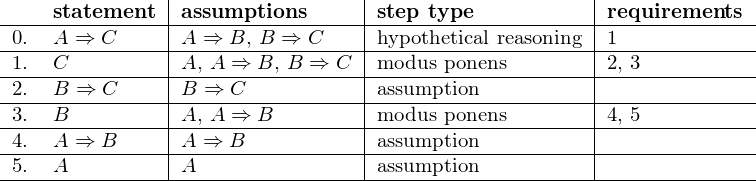

In [14]:
A_impl_C.proof()

Note that we can take any of the assumption to be the antecedent and then that assumption will be eliminated:

In [15]:
A_impl_B__impl__C = CviaTransitivity.asImplication(A_impl_B)
A_impl_B__impl__C

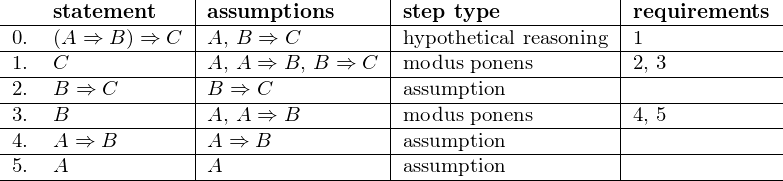

In [16]:
A_impl_B__impl__C.proof()

In the previous two demonstrations, where the new antecedent was drawn from the set of assumptions, we can think of *hypothetical reasoning* as a procedure in which we transform an "implicit" assumption to an "explicit" antecedent.  Similarly, *modus ponens* may be used to transform an "explicit" antecedent to an "implicit" assumption.  What is the difference between these two different forms of assumption/antecedent?  Why do we need both forms?  The explicit form is necessary because the implicit form cannot be nested.  For example, one could not precisely express $(A \Rightarrow C) \land (B \Rightarrow C) \Rightarrow [(A \lor B) \Rightarrow C]$ with assumptions alone.  The implicit form is also very important.  The implicit form (with assumptions) is extremely convenient, and necessary in the **Prove-It** framework, for accessing the consequent part of an implication directly and applying logical deduction that arise from that consequent (e.g., consider the role of $B$ as a consequent of $A \Rightarrow B$ in the above examples).

The new antecedent does not need to be one of the pre-existing assumptions, however.  After all, a **KnownTruth** is just as valid when extra assumptions are added (the requirements are simply over-complete).  For example,

In [17]:
X_impl_C = CviaTransitivity.asImplication(X)
X_impl_C

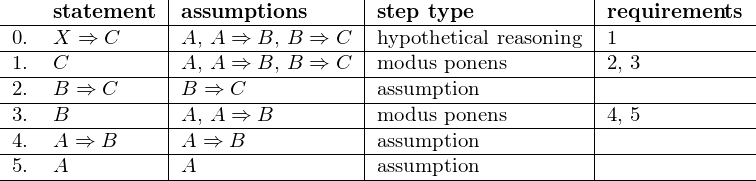

In [18]:
X_impl_C.proof()

## Automation regarding `Implies` objects

It is not always necessary to call the `deriveConsequent` method directly.  In fact, the `deriveConsequent` method is called automatically as a "side-effect" whenever a **KnownTruth** for an `Implies` **Expression** is created.  In the example below, a **KnownTruth** for $P \Rightarrow Q$ is created via proof-by-assumption which then triggers $Q$ to be derived as a consequent, adding the extra assumption for the antecedent $P$.  Then, a proof for $Q$, under the assumptions of $P \Rightarrow Q$ and $P$, is automatically generated and available upon request:

In [19]:
from proveit.common import P, Q, R, S
Q.prove([P, Implies(P, Q)])

This can be particularly useful when the request is made via some other automation (rather than the manual `prove` request that is demonstrated here).  This automation is enabled via a `deriveSideEffects` method in the `Implies` class which calls `deriveConsequent`.

In [20]:
help(Implies.deriveSideEffects)

Help on method deriveSideEffects in module proveit.logic.boolean.implication.implies:

deriveSideEffects(self, knownTruth) unbound proveit.logic.boolean.implication.implies.Implies method
    Record the KnownTruth implication in the knownImplications and knownImplicationsOfConsequent
    dictionaries so we can perform a search to later prove other implications via transitivity
    or conclude via implications (see concludeViaImplications).
    Also automatically derive the consequent given the antecedent as an added assumption.
    From A => FALSE, automatically derive Not(A) if [A in Booleans].
    From Not(A) => FALSE, automatically derive A if [A in Booleans].



Note that there are several things that may be attempted as automation here, not just `deriveConsequent`.  In general, the `deriveSideEffects` method of an **Expression** is called, if it exists, whenever a **KnownTruth** for that **Expression** is created.  The **KnownTruth** object is passed to this method.  This enables automation for a variety of **Expression** types, not just `Implies` objects.  Another way that automation may be performed is by implementing a `conclude` method which may attempt to automatically prove a particular type of expression under a given set of assumptions:

In [21]:
help(Implies.conclude)

Help on method conclude in module proveit.logic.boolean.implication.implies:

conclude(self, assumptions) unbound proveit.logic.boolean.implication.implies.Implies method
    Try to automatically conclude this implication by reducing its operands
    to true/false, or by doing a "transitivity" search amongst known true implications
    whose assumptions are covered by the given assumptions.



The following example of automation relies on `deriveSideEffects` to populate a dictionary of **KnownTruth** implications and then `conclude` to perform a search over these implications to find a path to a conclusion from a hypothesis using intermediate implications via transitivity relations (from $A \Rightarrow B$ and $B \Rightarrow C$, we can obtain $A \Rightarrow C$, as we proved in the previous section). 

In [22]:
P_impl_S = Implies(P, S).prove([Implies(P, Q), Implies(Q, R), Implies(R, S)])
P_impl_S

We will display the proof for the above **KnownTruth** that was proven via automation, but it relies upon invoking a theorem and applying *specialization* which will be discussed in detail in later tutorials.  Consider this to be a sneak peak.

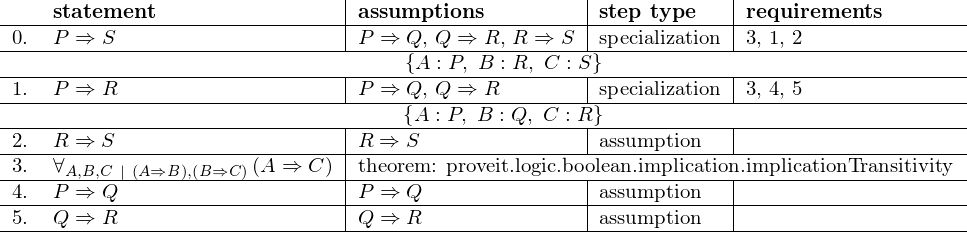

In [23]:
P_impl_S.proof()

It is also not always necessary to call `asImplication` to invoke *hypothetical reasoning*.  The `Implies.conclude` method will attempt to apply it automatically.

In [24]:
B_impl_C__impl__C = Implies(Implies(B, C), C).prove([A, A_impl_B])
B_impl_C__impl__C

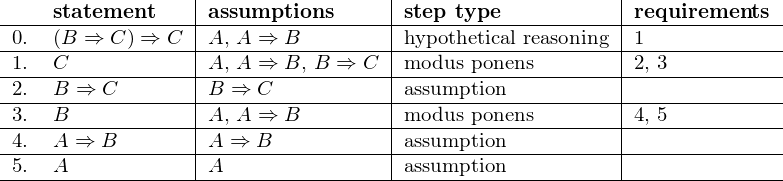

In [25]:
B_impl_C__impl__C.proof()

## Disabling/Enabling Automation

If desired, for whatever reason, automation (via `deriveSideEffects` and `conclude`) may be disabled by setting the `automation` flag of the `defaults` object to `False`:

In [26]:
from proveit import defaults
defaults.automation = False

We now attempt the automated proof through transitivity relations that we performed before (but simply in the reverse direction to make it different, otherwise it would remember the solution from before).  It will fail because automation is disabled.

In [27]:
from proveit import ProofFailure
try:
    Implies(S, P).prove([Implies(S, R), Implies(R, Q), Implies(Q, P)])
except ProofFailure as e:
    print "Expected error:", e

Expected error: Unable to prove S => P assuming {S => R, R => Q, Q => P}: No pre-existing proof


It may be re-enabled by setting this flag back to `True`:

In [28]:
defaults.automation = True

The above proof still will not work because we missed the opportunity of deriving side-effects:

In [29]:
from proveit import ProofFailure
try:
    Implies(S, P).prove([Implies(S, R), Implies(R, Q), Implies(Q, P)])
except ProofFailure as e:
    print "Expected error:", e

Expected error: Unable to prove P assuming {S => R, R => Q, Q => P, S}: Unable to conclude via implications


But there is a way to forget previously generated **KnownTruth**s (specifically $\{S \Rightarrow R\} \boldsymbol{\vdash} S \Rightarrow R$, $\{R \Rightarrow Q\} \boldsymbol{\vdash} R \Rightarrow Q$, and $\{Q \Rightarrow P\} \boldsymbol{\vdash} Q \Rightarrow P$) and try again.  This would not normally be desirable when generating proofs (ideally, each proof is small and in its own Jupyter/IPython notebook session).  But it is useful for our demonstration purpose here.

In [30]:
from proveit import KnownTruth
KnownTruth.forgetKnownTruths()

In [31]:
Implies(S, P).prove([Implies(S, R), Implies(R, Q), Implies(Q, P)])

In addition to changing `defaults.automation`, it is also possible to disable automation for a particular instance when calling `prove`.  Basically, this just checks if something has been proven already (or is proven by the assumptions or their automatic side-effects) and raises a `ProofFailure` otherwise.  This can be useful in other automation to quickly check a possible proof pathway without potentially wasting the effort to commit to that pathway.

For example:

In [32]:
from proveit.common import X, Y, Z
try:
    Implies(X, Z).prove([Implies(X, Y), Implies(Y, Z)], automation=False)
except ProofFailure as e:
    print "Expected error:", e

Expected error: Unable to prove X => Z assuming {X => Y, Y => Z}: No pre-existing proof


But using the default `automation=True`, we can automatically prove this implication via transitivity (just as we saw above).

In [33]:
Implies(X, Z).prove([Implies(X, Y), Implies(Y, Z)])